# Credit EDA Case Study

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
application = pd.read_csv('Documents/Credit EDA Case Study/application_data.csv')
pd.set_option('display.max_columns', 500)

In [3]:
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## Detecting and Treating Missing Values

In [4]:
# Percentage of null values in every column
app_null = round(100*(application.isnull().sum()/len(application.index)),2)
print(app_null)

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.09
NAME_TYPE_SUITE                0.42
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
DAYS_ID_PUBLISH                0.00
OWN_CAR_AGE                   65.99
FLAG_MOBIL                     0.00
FLAG_EMP_PHONE                 0.00
FLAG_WORK_PHONE                0.00
FLAG_CONT_MOBILE               0.00
FLAG_PHONE                     0.00
FLAG_EMAIL                  

In [5]:
# Removing columns with null values more than 40%
app_null = pd.DataFrame(app_null)
app_null1 = app_null[app_null[0] >= 40.00]
app_null1 = app_null1.T
list1 = list(app_null1)
application = application.drop(list1, axis=1)

In [6]:
# Checking the other columns 
x = round(100*(application.isnull().sum()/len(application.index)),2)
app = pd.DataFrame(x)
app = app[app[0]>0].T
list2 = list(app)
application[list2].describe() 

,AMT_GOODS_PRICE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,3.072330e+05,3.068510e+05,246546.000000,306490.000000,306490.000000,306490.000000,306490.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,5.383962e+05,5.143927e-01,0.510853,1.422245,0.143421,1.405292,0.100049,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,3.694465e+05,1.910602e-01,0.194844,2.400989,0.446698,2.379803,0.362291,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,4.050000e+04,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.385000e+05,3.924574e-01,0.370650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000e+05,5.659614e-01,0.535276,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6.795000e+05,6.636171e-01,0.669057,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.050000e+06,8.549997e-01,0.896010,348.000000,34.000000,344.000000,24.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


These are the columns with null values between 0-20%. Above description will let us know if we could impute the values in the place of null values.

In [7]:
# For columns having null values between 10-13%
application['AMT_REQ_CREDIT_BUREAU_DAY'] =  application['AMT_REQ_CREDIT_BUREAU_DAY'].astype('category')
print(application['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts())

application['AMT_REQ_CREDIT_BUREAU_HOUR'] =  application['AMT_REQ_CREDIT_BUREAU_HOUR'].astype('category')
print(application['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts())

application['AMT_REQ_CREDIT_BUREAU_WEEK'] =  application['AMT_REQ_CREDIT_BUREAU_WEEK'].astype('category')
print(application['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts())

application['AMT_REQ_CREDIT_BUREAU_MON'] =  application['AMT_REQ_CREDIT_BUREAU_MON'].astype('category')
print(application['AMT_REQ_CREDIT_BUREAU_MON'].value_counts())

application['AMT_REQ_CREDIT_BUREAU_QRT'] =  application['AMT_REQ_CREDIT_BUREAU_QRT'].astype('category')
print(application['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts())

application['AMT_REQ_CREDIT_BUREAU_YEAR'] =  application['AMT_REQ_CREDIT_BUREAU_YEAR'].astype('category')
print(application['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts())

0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64
0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64
0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64
0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
22.0         1
23.0         1
27.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64
0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0 

We can impute the missing values with mode for these columns. As mode deals with the frequency of the elements and these are categorical variables we can fill the null values with the most frequent element or values.

In [8]:
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Selecting the variables which are useful in analysis

In [9]:
# Selecting the columns that are required for the analysis 
list_col = ['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_REGISTRATION', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE']
application = application[list_col]
application = application.dropna(axis=0)
application.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_REGISTRATION,OCCUPATION_TYPE,CNT_FAM_MEMBERS,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE
0,1,Cash loans,M,Y,202500.0,406597.5,24700.5,351000.0,-9461,-3648.0,Laborers,1.0,Working,Secondary / secondary special,House / apartment
1,0,Cash loans,F,N,270000.0,1293502.5,35698.5,1129500.0,-16765,-1186.0,Core staff,2.0,State servant,Higher education,House / apartment
2,0,Revolving loans,M,Y,67500.0,135000.0,6750.0,135000.0,-19046,-4260.0,Laborers,1.0,Working,Secondary / secondary special,House / apartment
3,0,Cash loans,F,Y,135000.0,312682.5,29686.5,297000.0,-19005,-9833.0,Laborers,2.0,Working,Secondary / secondary special,House / apartment
4,0,Cash loans,M,Y,121500.0,513000.0,21865.5,513000.0,-19932,-4311.0,Core staff,1.0,Working,Secondary / secondary special,House / apartment


In [10]:
# Shape of the dataset on which we do our analysis
application.shape

(210887, 15)

In [11]:
# Detecting the outliers for numerical columns using InterQuantile Range(IQR) method
numeric_col = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']
df1_num = application[numeric_col]
df1_numq1 = df1_num.quantile(0.25)
df1_numq3 = df1_num.quantile(0.75)
iqr = df1_numq3 -df1_numq1
l_out = df1_numq1-(1.5*iqr)
u_out = df1_numq3+(1.5*iqr)
print("Inter Quantile Values are as follows:\n",iqr)
print("Lower Quantile Values are as follows:\n",l_out)
print("Upper Quantile Values are as follows:\n",u_out)

Inter Quantile Values are as follows:
 AMT_INCOME_TOTAL     99000.0
AMT_CREDIT          546853.5
AMT_ANNUITY          18517.5
AMT_GOODS_PRICE     441000.0
dtype: float64
Lower Quantile Values are as follows:
 AMT_INCOME_TOTAL    -36000.00
AMT_CREDIT         -542310.75
AMT_ANNUITY         -10680.75
AMT_GOODS_PRICE    -414000.00
dtype: float64
Upper Quantile Values are as follows:
 AMT_INCOME_TOTAL     360000.00
AMT_CREDIT          1645103.25
AMT_ANNUITY           63389.25
AMT_GOODS_PRICE     1350000.00
dtype: float64


Any values above the Upper Quantile value and below the Lower Quantile value are considered as outliers. There is need to remove these outliers as they are extreme values which hamper the quality of analysis and if outliers are not removed there is a possibility that wrong analysis are delivered.

In [12]:
# Removing The outliers 
x =application.loc[(application['AMT_CREDIT']<1616625.00)]
x = x.loc[(x['AMT_INCOME_TOTAL']<300000.00)]
x = x.loc[(x['AMT_ANNUITY']<61742.25)]
x = x.loc[(x['AMT_GOODS_PRICE']<1341000.00)]

In [13]:
# Shape of the data set after removing outliers
x.shape

(184641, 15)

In [14]:
# Binning the columns 
# Creating the new column YEARS_BIRTH from DAYS_BIRTH by converting no. of days into years
x['YEARS_BIRTH']= x['DAYS_BIRTH'].map(lambda x: round(-x//365,2))
bins1 = [15,25,35,45,55,65,75]
x['YEARS_BIRTH']  = pd.cut(x['YEARS_BIRTH'], bins=bins1)
bins2 = [0,3,6,9,12,15,18,21]
x['CNT_FAM_MEMBERS'] = pd.cut(x['CNT_FAM_MEMBERS'], bins=bins2)
x['DAYS_REGISTRATION'] = x['DAYS_REGISTRATION'].abs()

In [15]:
# Divding data according to Target
df_1 = x.loc[x['TARGET']==1]
df_0 = x.loc[x['TARGET']==0]

In [16]:
# Inbalance between the datasets for the customers having trouble paying loan on time (TARGET=1) and for all other cases (TARGET=0)
print(df_1.shape[0])
print(df_0.shape[0])
inb = round(100*(df_1.shape[0]/df_0.shape[0]))
print('The inbalance is ', inb,"%")

17034
167607
The inbalance is  10 %


In [17]:
df_1.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_REGISTRATION,OCCUPATION_TYPE,CNT_FAM_MEMBERS,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,YEARS_BIRTH
0,1,Cash loans,M,Y,202500.0,406597.5,24700.5,351000.0,-9461,3648.0,Laborers,"(0, 3]",Working,Secondary / secondary special,House / apartment,"(15, 25]"
26,1,Cash loans,F,Y,112500.0,979992.0,27076.5,702000.0,-18724,6573.0,Cooking staff,"(0, 3]",Working,Secondary / secondary special,House / apartment,"(45, 55]"
40,1,Cash loans,M,Y,202500.0,1193580.0,35028.0,855000.0,-17482,1182.0,Laborers,"(0, 3]",Commercial associate,Secondary / secondary special,House / apartment,"(45, 55]"
42,1,Cash loans,F,N,135000.0,288873.0,16258.5,238500.0,-13384,45.0,Sales staff,"(0, 3]",Working,Secondary / secondary special,House / apartment,"(35, 45]"
110,1,Cash loans,F,Y,157500.0,723996.0,30802.5,585000.0,-10526,387.0,Sales staff,"(0, 3]",Commercial associate,Incomplete higher,House / apartment,"(25, 35]"


In [18]:
# Dropping column DAYS_BIRTH
df_1 = df_1.drop(['DAYS_BIRTH'], axis=1)
df_0 = df_0.drop(['DAYS_BIRTH'], axis=1)


### Univariate and Bivariate analysis for Target=1 and Target=0 

#### Univariate Analysis

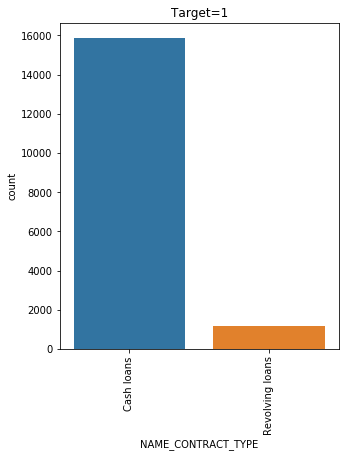

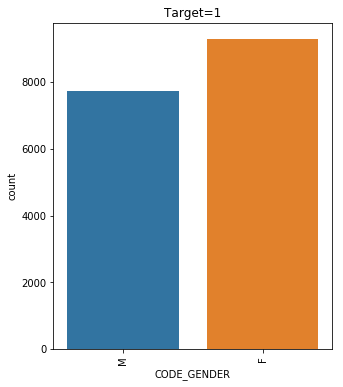

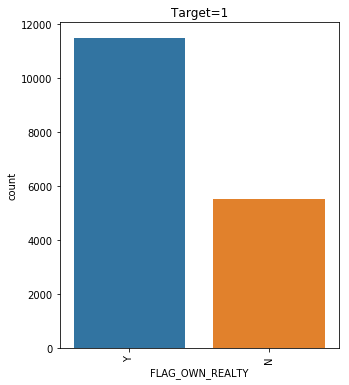

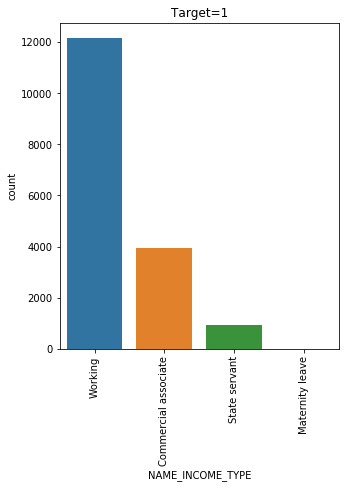

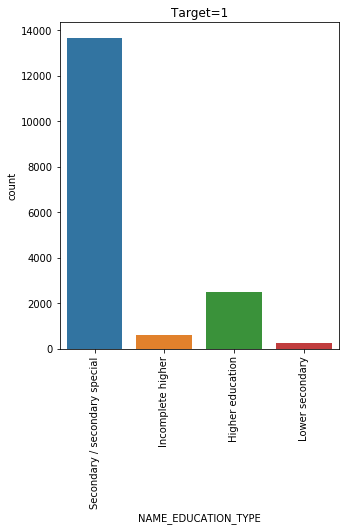

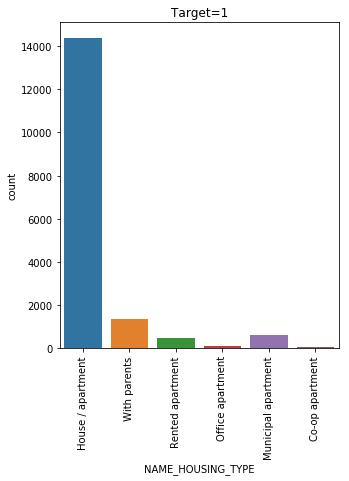

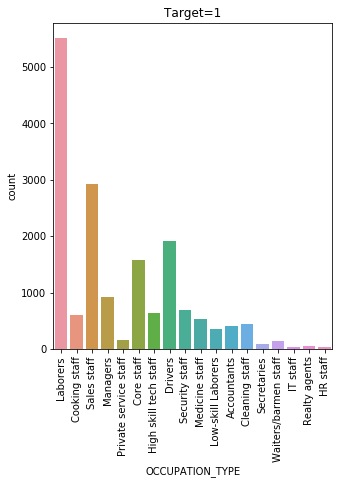

In [19]:
# Univariate and segmented Univariate analysis for Target=1
col_uni = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']
uni = df_1[col_uni]
for col in col_uni:
    plt.figure(figsize=(5,6))
    sns.countplot(x=col, data=uni)
    plt.xticks(rotation=90)
    plt.title('Target=1')
    plt.show()

1. From Chart 1 we can see that for the type of contract (NAME_CONTRACT_TYPE) the Cash loans are facing more difficulties in   repaying the loan than the Revolving loans. As revolving loans can be repaid, withdrawn and redraw again in any manner.
2. From Chart 2 we can see that the Gender(CODE_GENDER) Females are facing more difficulties than Males this can be because of  various reasons like employment for the females in the region, basic pay for females etc.
3. From Chart 3 (OWN_REALTY) the people owning a house is facing more difficulties while the ones that don't own the house having less difficulties this can be because the ones with houses may have previous loans that they have to repay
4. From Chart 4 (NAME_INCOME_TYPE) we can see that the working class is struggling more as working class have labors, cleaning staff, drivers in this category.
5. From Chart 5 (NAME_EDUCATION_TYPE) the ones with secondary/secondrary special are struggling more as compared to others. What is fascinating that ones with primary are struggling less than secondary.
6. From Chart 6 (NAME_HOUSING_TYPE) people living in House/Apartments are struggling the most while there is signinficantly low number of people in other categories
7. From chart 7 (OCCUPATION_TYPE) Laborers struggles more this can be because uneven daily wages or sometimes they might be out of work

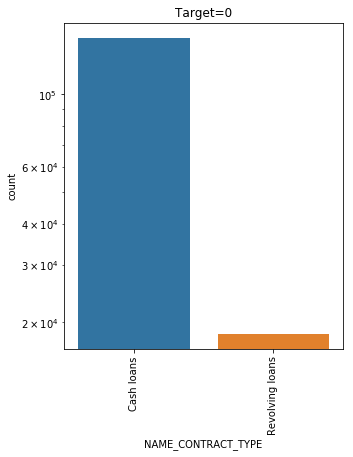

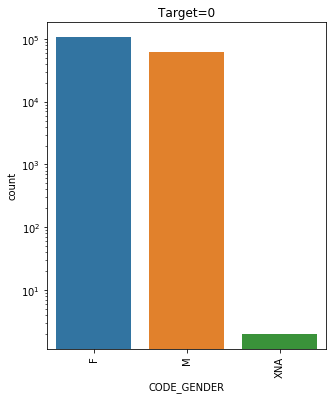

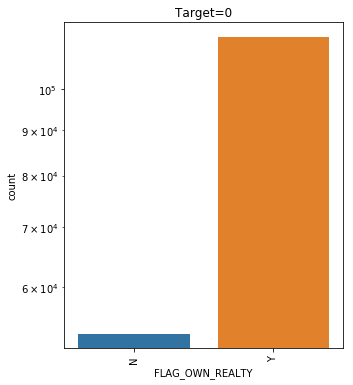

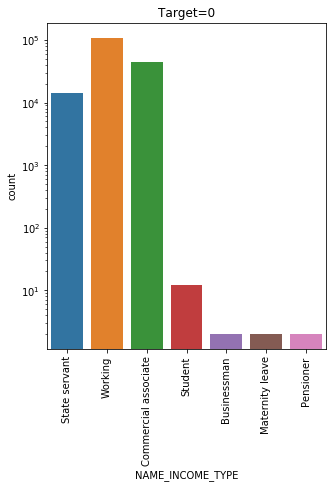

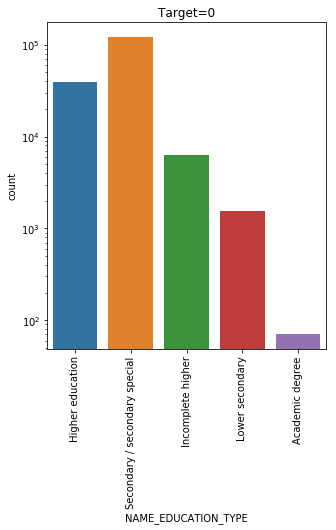

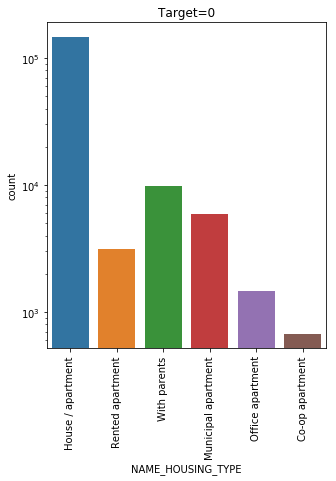

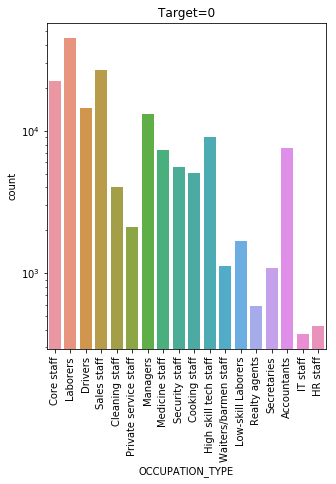

In [20]:
# Univariate analysis for target=0
col_uni_0 = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']
uni0 = df_0[col_uni_0]
for col in uni0:
    plt.figure(figsize=(5,6))
    sns.countplot(x=col, data=uni0)
    plt.xticks(rotation=90)
    plt.yscale('log')
    plt.title('Target=0')
    plt.show()

1. From Chart 1(NAME_CONTRACT_TYPE) we can see that cash loans with no difficulties are maximum while in case of difficulties cash loans was facing more difficulties than the revolving loans. From this we can implie that the type of loan contract is not a strong driving factor.
2. From Chart 2(CODE_GENDER) we can see number of Females are quite high than the number of Males with no difficulties in loan repayment while There is no XNA category facing loan repayment issue.
3. From Chart 3(OWN_REALTY) shows contradictory nature as we can see here the ones with owning a house have no difficulties in loan repayment.
4. From chart 4(NAME_INCOME_TYPE) we see 'Working' sections are high in ease of loan repqyment as comparison to others which is contradictory to the case of TARGET=1 and categories like Maternity Leave, Businessman, Pensioner have no difficulties in the loan repayment.
5. From Chart 5(NAME_EDUCATION_TYPE) In comparison to Target=1 we see that Secondary/Special Secondary category have high numbers in no difficulties in loan repayment and the Academic Degree category have no loan repayment difficulties
6. From Chart 6(NAME_HOUSING_TYPE) In comparison to Target=1 the count of House/Apartment category is high wwith no loan paying difficulties.
7. From chart 7(OCCUPATION_TYPE) we can see that Laborers are highest in having no difficulties in repayment of loan.

### Segmented Univariate Analysis

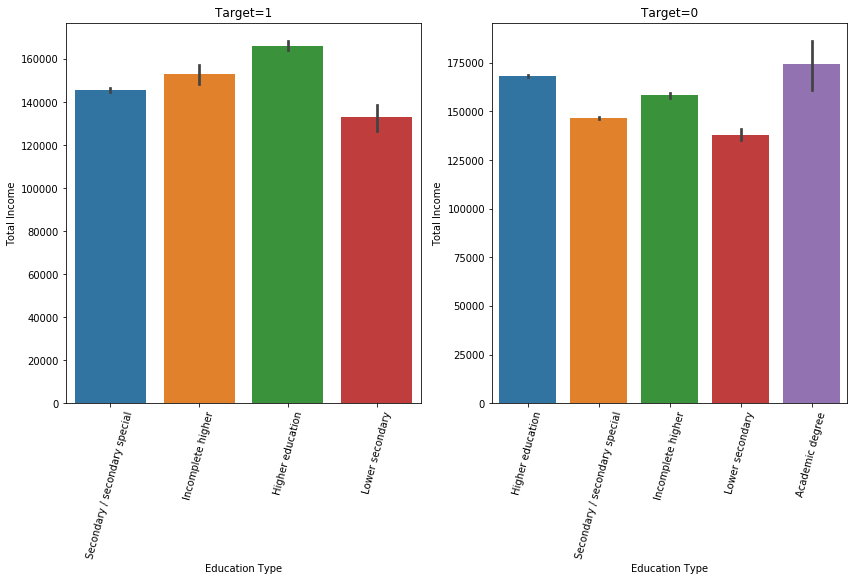

In [21]:

plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
sns.barplot(y='AMT_INCOME_TOTAL', x='NAME_EDUCATION_TYPE', data=df_1)
plt.ylabel('Total Income')
plt.xlabel('Education Type')
plt.xticks(rotation=75)
plt.title('Target=1')


plt.subplot(1,2,2)
sns.barplot(y='AMT_INCOME_TOTAL', x='NAME_EDUCATION_TYPE', data=df_0)
plt.ylabel('Total Income')
plt.xlabel('Education Type')
plt.xticks(rotation=75)
plt.title('Target=0')
plt.show()

The average total income for the education type which having difficulties in loan repayment is bit low than the ones with no payment difficulties. We can also see that the average income for the ones having Academic Degree is Maximum followed by the Higher Education.

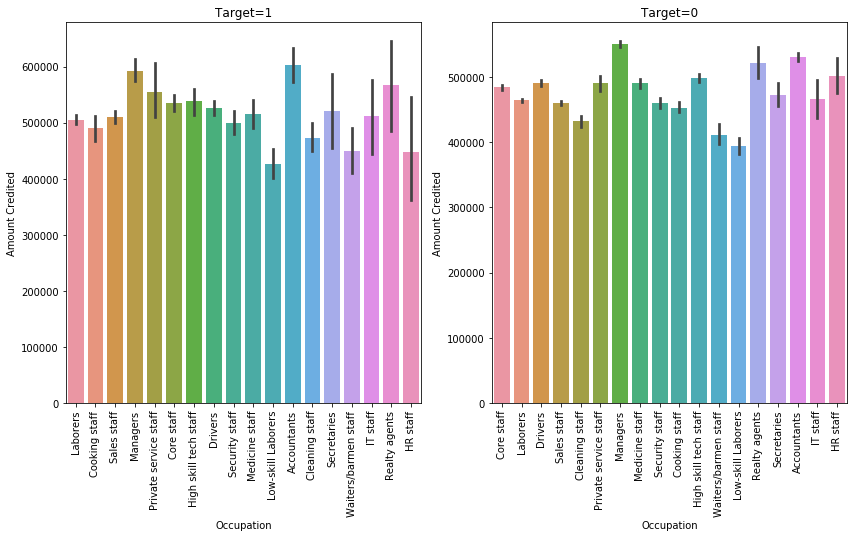

In [22]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
sns.barplot(x='OCCUPATION_TYPE', y='AMT_CREDIT', data=df_1)
plt.xlabel('Occupation')
plt.ylabel('Amount Credited')
plt.xticks(rotation=90)
plt.title('Target=1')

plt.subplot(1,2,2)
sns.barplot(x='OCCUPATION_TYPE', y='AMT_GOODS_PRICE', data=df_0)
plt.xlabel('Occupation')
plt.ylabel('Amount Credited')
plt.xticks(rotation=90)
plt.title('Target=0')

plt.show()

The average amount credited is bit high for the occupations who are facing difficulties in repayment of the loan while for the occupations who are facing no difficulties the loan credited is bit less than the occupations facing difficulties 

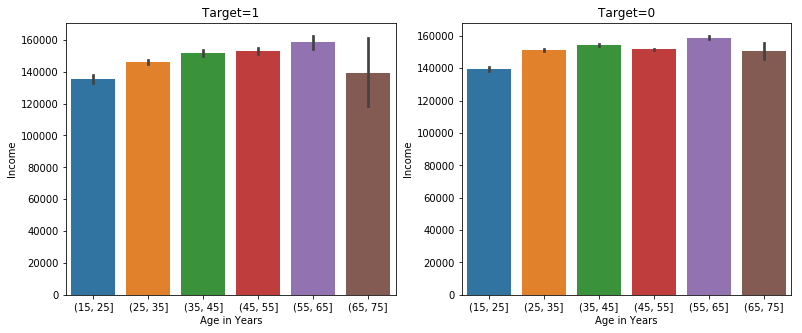

In [23]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.barplot(x='YEARS_BIRTH', y='AMT_INCOME_TOTAL', data=df_1)
plt.ylabel('Income')
plt.xlabel('Age in Years')
plt.title('Target=1')

plt.subplot(1,2,2)
sns.barplot(x='YEARS_BIRTH', y='AMT_INCOME_TOTAL', data=df_0)
plt.ylabel('Income')
plt.xlabel('Age in Years')
plt.title('Target=0')

plt.show()

The age group of [65,75] with mean income less than 140000 is having troubles in loan repayment than the mean income above 140000 of the same group. We can also see with increase in age group till [55-65] the average income also increases and but still facing difficulties in loan repayment. 

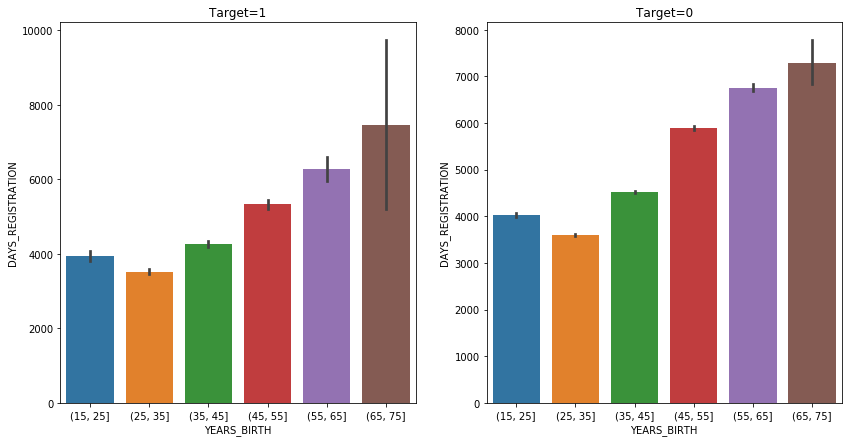

In [24]:
plt.figure(figsize=(14,7))

plt.subplot(1,2,1)
sns.barplot(x='YEARS_BIRTH', y='DAYS_REGISTRATION', data=df_1)
plt.title('Target=1')

plt.subplot(1,2,2)
sns.barplot(x='YEARS_BIRTH', y='DAYS_REGISTRATION', data=df_0)
plt.title('Target=0')

plt.show()

From age [25,35] to age [65,75] the Days of Registration increase for both the graphs and in Target=1 where persons having more difficulties in repayment of the loan are the days of registration are bit less on average. So from this we can say the ones with more Days in registration are bit less likely to encounter difficulties in repayment of loan.

#### Bivariate Analysis

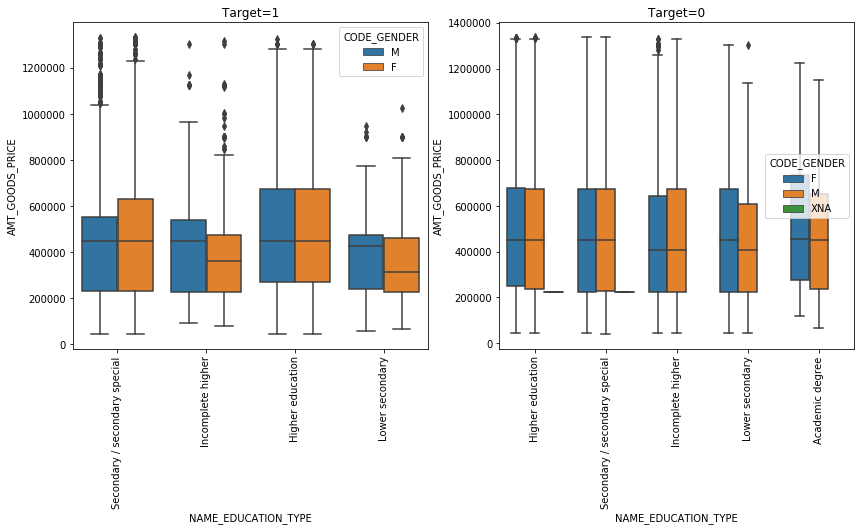

In [25]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.boxplot(x='NAME_EDUCATION_TYPE', y='AMT_GOODS_PRICE', hue="CODE_GENDER", data=df_1)
plt.xticks(rotation=90)
plt.title('Target=1')

plt.subplot(1,2,2)
sns.boxplot(x='NAME_EDUCATION_TYPE', y='AMT_GOODS_PRICE', hue="CODE_GENDER", data=df_0)
plt.xticks(rotation=90)
plt.title('Target=0')

plt.show()

In Target=1 For goods price Females in Secondary/Special Secondary conditions are more while Incomplete higher and Lower Secondary category are low but in Higher education they are almost same.
For Target= 0 males and females in Higher education, Secondary/Secondary Special and Academic Degree is almost similar while in incomplete higher males are less than female and in lower secondary females are less than males.

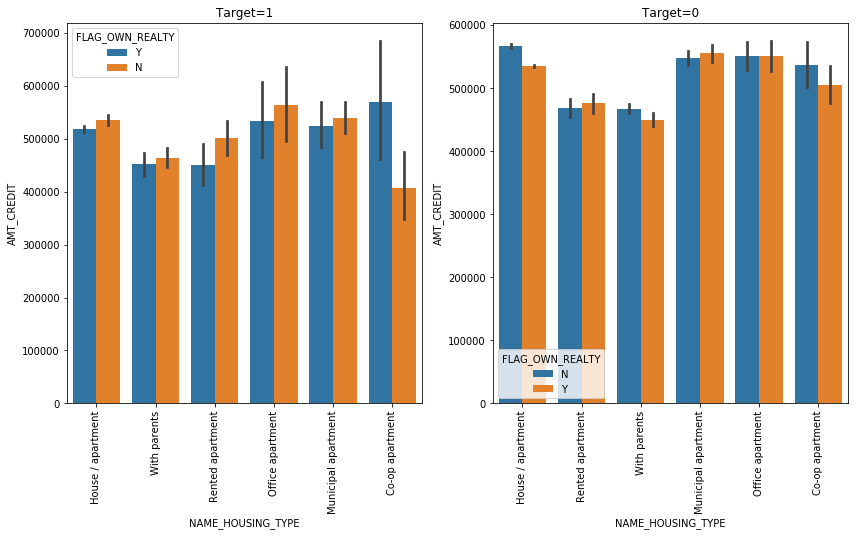

In [26]:
plt.figure(figsize=(14,7))

plt.subplot(1,2,1)
sns.barplot(x='NAME_HOUSING_TYPE', y='AMT_CREDIT', hue="FLAG_OWN_REALTY", data=df_1)
plt.xticks(rotation=90)
plt.title('Target=1')

plt.subplot(1,2,2)
sns.barplot(x='NAME_HOUSING_TYPE', y='AMT_CREDIT', hue="FLAG_OWN_REALTY", data=df_0)
plt.xticks(rotation=90)
plt.title('Target=0')
plt.show()

We can see that in both the cases the ones that owns no house are credited with more amount but for the Co-op-apartment housing category the ones that owns property have credited with large amounts and are facing difficulties with the loan repayment.

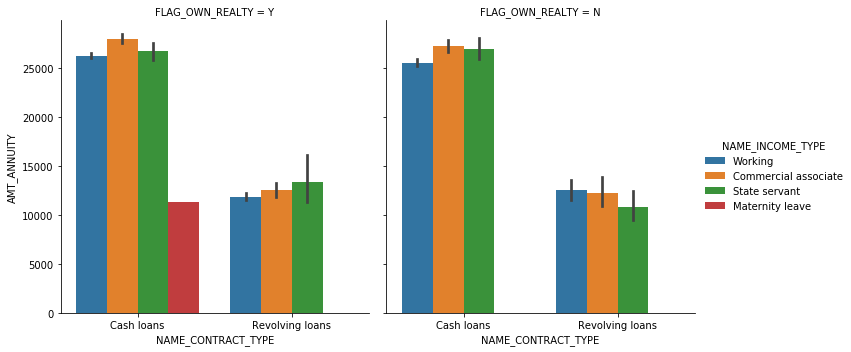

In [27]:
# For Target=1
x = sns.catplot(x='NAME_CONTRACT_TYPE', y='AMT_ANNUITY', hue='NAME_INCOME_TYPE', col='FLAG_OWN_REALTY', kind='bar', data=df_1)
plt.show(x)

What we can see here the only loans that the ones with own house and income type is Maternity Leave has taken is cash loans this is may be because the Annuity is the series of payments made in regular intervals. For State Servants who owns house and taken in revloving loans have more anuity than ones who don't have own house in revolving loans.

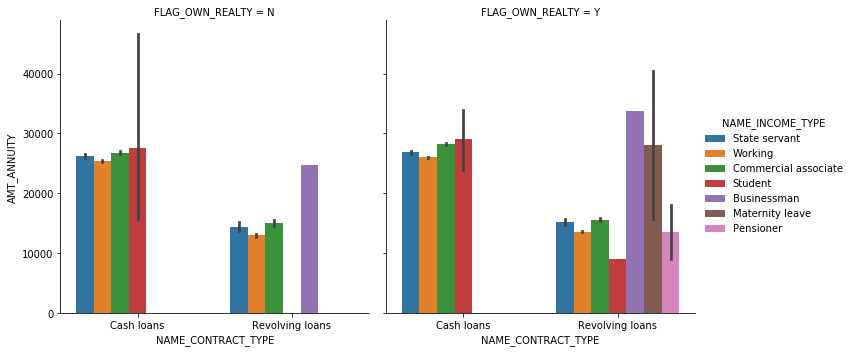

In [28]:
# For Target=0
sns.catplot(x='NAME_CONTRACT_TYPE', y='AMT_ANNUITY', hue='NAME_INCOME_TYPE', col='FLAG_OWN_REALTY', kind='bar', data=df_0)
plt.show(x)

The applicants whic are Businessman, Pensioner and Maternity leave and owns reality have high annuity in revolving loans as in revolving loans arrangement allows the loan amount paid, withdrawn and redrawn in any manner

#### Correlation Matrix 

In [29]:
#Correlation matrix for TARGET=1
cor_1 = df_1.drop(['TARGET'], axis=1)
cor_1 = cor_1.corr()
round(cor_1, 3)

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_REGISTRATION
AMT_INCOME_TOTAL,1.000,0.298,0.375,0.300,0.006
AMT_CREDIT,0.298,1.000,0.733,0.978,0.043
AMT_ANNUITY,0.375,0.733,1.000,0.732,-0.017
AMT_GOODS_PRICE,0.300,0.978,0.732,1.000,0.042
DAYS_REGISTRATION,0.006,0.043,-0.017,0.042,1.000


In [30]:
# Co-relation betwwen the numerical values in descending order
sol = (cor_1.where(np.triu(np.ones(cor_1.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False))
print(sol)

AMT_CREDIT        AMT_GOODS_PRICE      0.977961
                  AMT_ANNUITY          0.732503
AMT_ANNUITY       AMT_GOODS_PRICE      0.731825
AMT_INCOME_TOTAL  AMT_ANNUITY          0.375135
                  AMT_GOODS_PRICE      0.300045
                  AMT_CREDIT           0.297952
AMT_CREDIT        DAYS_REGISTRATION    0.042706
AMT_GOODS_PRICE   DAYS_REGISTRATION    0.041715
AMT_INCOME_TOTAL  DAYS_REGISTRATION    0.005503
AMT_ANNUITY       DAYS_REGISTRATION   -0.016800
dtype: float64


In [31]:
# Correlation Matrix for TARGET=0
cor_0 = df_0.drop(['TARGET'], axis=1)
cor_0 = cor_0.corr()
round(cor_0,3)

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_REGISTRATION
AMT_INCOME_TOTAL,1.000,0.308,0.383,0.311,-0.025
AMT_CREDIT,0.308,1.000,0.750,0.981,0.031
AMT_ANNUITY,0.383,0.750,1.000,0.749,-0.000
AMT_GOODS_PRICE,0.311,0.981,0.749,1.000,0.028
DAYS_REGISTRATION,-0.025,0.031,-0.000,0.028,1.000


In [32]:
# Co-relation of numerical values in descending order
sol1 = (cor_0.where(np.triu(np.ones(cor_0.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False))
print(sol1)

AMT_CREDIT        AMT_GOODS_PRICE      0.981403
                  AMT_ANNUITY          0.750176
AMT_ANNUITY       AMT_GOODS_PRICE      0.749093
AMT_INCOME_TOTAL  AMT_ANNUITY          0.383289
                  AMT_GOODS_PRICE      0.310624
                  AMT_CREDIT           0.307597
AMT_CREDIT        DAYS_REGISTRATION    0.030839
AMT_GOODS_PRICE   DAYS_REGISTRATION    0.027902
AMT_ANNUITY       DAYS_REGISTRATION   -0.000339
AMT_INCOME_TOTAL  DAYS_REGISTRATION   -0.025149
dtype: float64


1. From above Correlation Matrices for Target 1 and Target=0 we can see that AMT_CREDIT and AM_GOODS_PRICE are highly correlated followed by AMT_CREDIT and AMT_ANNUITY. 
2. We can also see from the descending values of correlation matrices that in both cases where client face difficulties in loan repayment and all other cases they follow the same pattern of correlation between the numerical variables. 

## Analysis For Previous Applications

In [33]:
# Reading the file
df = pd.read_csv("Documents/Credit EDA Case Study/previous_application.csv", encoding = "ISO-8859-1")
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

In [34]:
df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# Finding percentage of missing values in dataset
missing_count = (df.isnull().sum() / len(df)) * 100

# Columns having missing count > 0
missing_count = missing_count[missing_count > 0]
print(missing_count.sort_values())

AMT_CREDIT                    0.000060
PRODUCT_COMBINATION           0.020716
CNT_PAYMENT                  22.286366
AMT_ANNUITY                  22.286665
AMT_GOODS_PRICE              23.081773
DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
DAYS_TERMINATION             40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
NAME_TYPE_SUITE              49.119754
AMT_DOWN_PAYMENT             53.636480
RATE_DOWN_PAYMENT            53.636480
RATE_INTEREST_PRIMARY        99.643698
RATE_INTEREST_PRIVILEGED     99.643698
dtype: float64


In [36]:
# Dropping the columns where missing values percentage is grater than 50%
df.dropna(thresh = len(df) * .5, axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 33 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRACT_STATUS           1670214 non-null object
DAYS_DECISION                  1670214 non-null int64
NAME_PAYMENT_TYPE              1670214 non-null object
CODE_REJECT_REASON             1670214 non-null object
NAME_TYP

In [37]:
#Again check how many missing values are there?

missing_count = (df.isnull().sum() / len(df)) * 100

# Columns having missing count > 0
missing_count = missing_count[missing_count > 0]

print(missing_count.sort_values())

AMT_CREDIT                    0.000060
PRODUCT_COMBINATION           0.020716
CNT_PAYMENT                  22.286366
AMT_ANNUITY                  22.286665
AMT_GOODS_PRICE              23.081773
DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
DAYS_TERMINATION             40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
NAME_TYPE_SUITE              49.119754
dtype: float64


In [38]:
#Find all columns where more than 1 unique values exists
df = df.loc[:,df.nunique()>1]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 33 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRACT_STATUS           1670214 non-null object
DAYS_DECISION                  1670214 non-null int64
NAME_PAYMENT_TYPE              1670214 non-null object
CODE_REJECT_REASON             1670214 non-null object
NAME_TYP

If we check our data, few columns have 365243 as an outlier and only positive value, so we will replace it with null. Now if we check description of each column, we can see that data is widely distributed and standard deviation is higher. So we will impute these values with mean of values of that column.

In [39]:
lst_quantile = ['DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION']
for lst in lst_quantile:
    df[lst].replace({365243:np.nan},inplace=True)
    df[lst].replace(np.nan, df[lst].mean(), regex=True,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 33 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRACT_STATUS           1670214 non-null object
DAYS_DECISION                  1670214 non-null int64
NAME_PAYMENT_TYPE              1670214 non-null object
CODE_REJECT_REASON             1670214 non-null object
NAME_TYP

In [40]:
#Check for missing values

missing_count = (df.isnull().sum() / len(df)) * 100

# Columns having missing count > 0
missing_count = missing_count[missing_count > 0]

print(missing_count.sort_values())

AMT_CREDIT                    0.000060
PRODUCT_COMBINATION           0.020716
CNT_PAYMENT                  22.286366
AMT_ANNUITY                  22.286665
AMT_GOODS_PRICE              23.081773
NFLAG_INSURED_ON_APPROVAL    40.298129
NAME_TYPE_SUITE              49.119754
dtype: float64


In [41]:
# Drop few columns which still have null values and we wont consider them for our analysis. 
df.drop(['CNT_PAYMENT','NAME_TYPE_SUITE','AMT_ANNUITY','AMT_GOODS_PRICE','NFLAG_INSURED_ON_APPROVAL'],axis=1,inplace=True)

In [42]:
# All null values are now either removed or imputed.

missing_count = (df.isnull().sum() / len(df)) * 100

# Columns having missing count > 0
missing_count = missing_count[missing_count > 0]
print(len(missing_count))
print(missing_count.sort_values())

2
AMT_CREDIT             0.000060
PRODUCT_COMBINATION    0.020716
dtype: float64


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 28 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRACT_STATUS           1670214 non-null object
DAYS_DECISION                  1670214 non-null int64
NAME_PAYMENT_TYPE              1670214 non-null object
CODE_REJECT_REASON             1670214 non-null object
NAME_CLIENT_TYPE               1670214 non-null object
NAME_GOODS_CATEGORY            1670214 non-null object
NAME_PORTF

In [44]:
# Importing the libraries we further require for analysis
import glob 
import collections
import scipy.stats as stats

pd.set_option('display.max_columns', 500)
pd.set_option('mode.chained_assignment', None)

### Univariate Analysis

In [45]:
# Finding numerical features
numeric_data = df.select_dtypes(include = [np.number])


# Finding categorical features;
categorical_data = df.select_dtypes(exclude = [np.number])

#Let's print how many numerical and categorical features do we have
print('There are {0} numerical and {1} categorical features in the training data'.\
     format(numeric_data.shape[1], categorical_data.shape[1]))


There are 13 numerical and 15 categorical features in the training data


In [46]:
categorical_data_relavant = categorical_data[['NAME_CONTRACT_TYPE', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','PRODUCT_COMBINATION']]

Plot countplot to get the feel of influence of each of the categorical varibale on no. of records in dataset. Most of the loan requests are from channel type "Credit and Cash Offices" and "Country-worldwide". Similary, purpose of cash loan is XNA and XAP in most of the cases. Most of the applicants are Repeater followed by New followed by Refreshed. Most of these requests are approved. Requests cancelled are greater than requests refused. Most of the loan requests are Cash and Consumer loans followed by Revolving loans.

C:\Users\Shreyansh Behani\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Shreyansh Behani\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


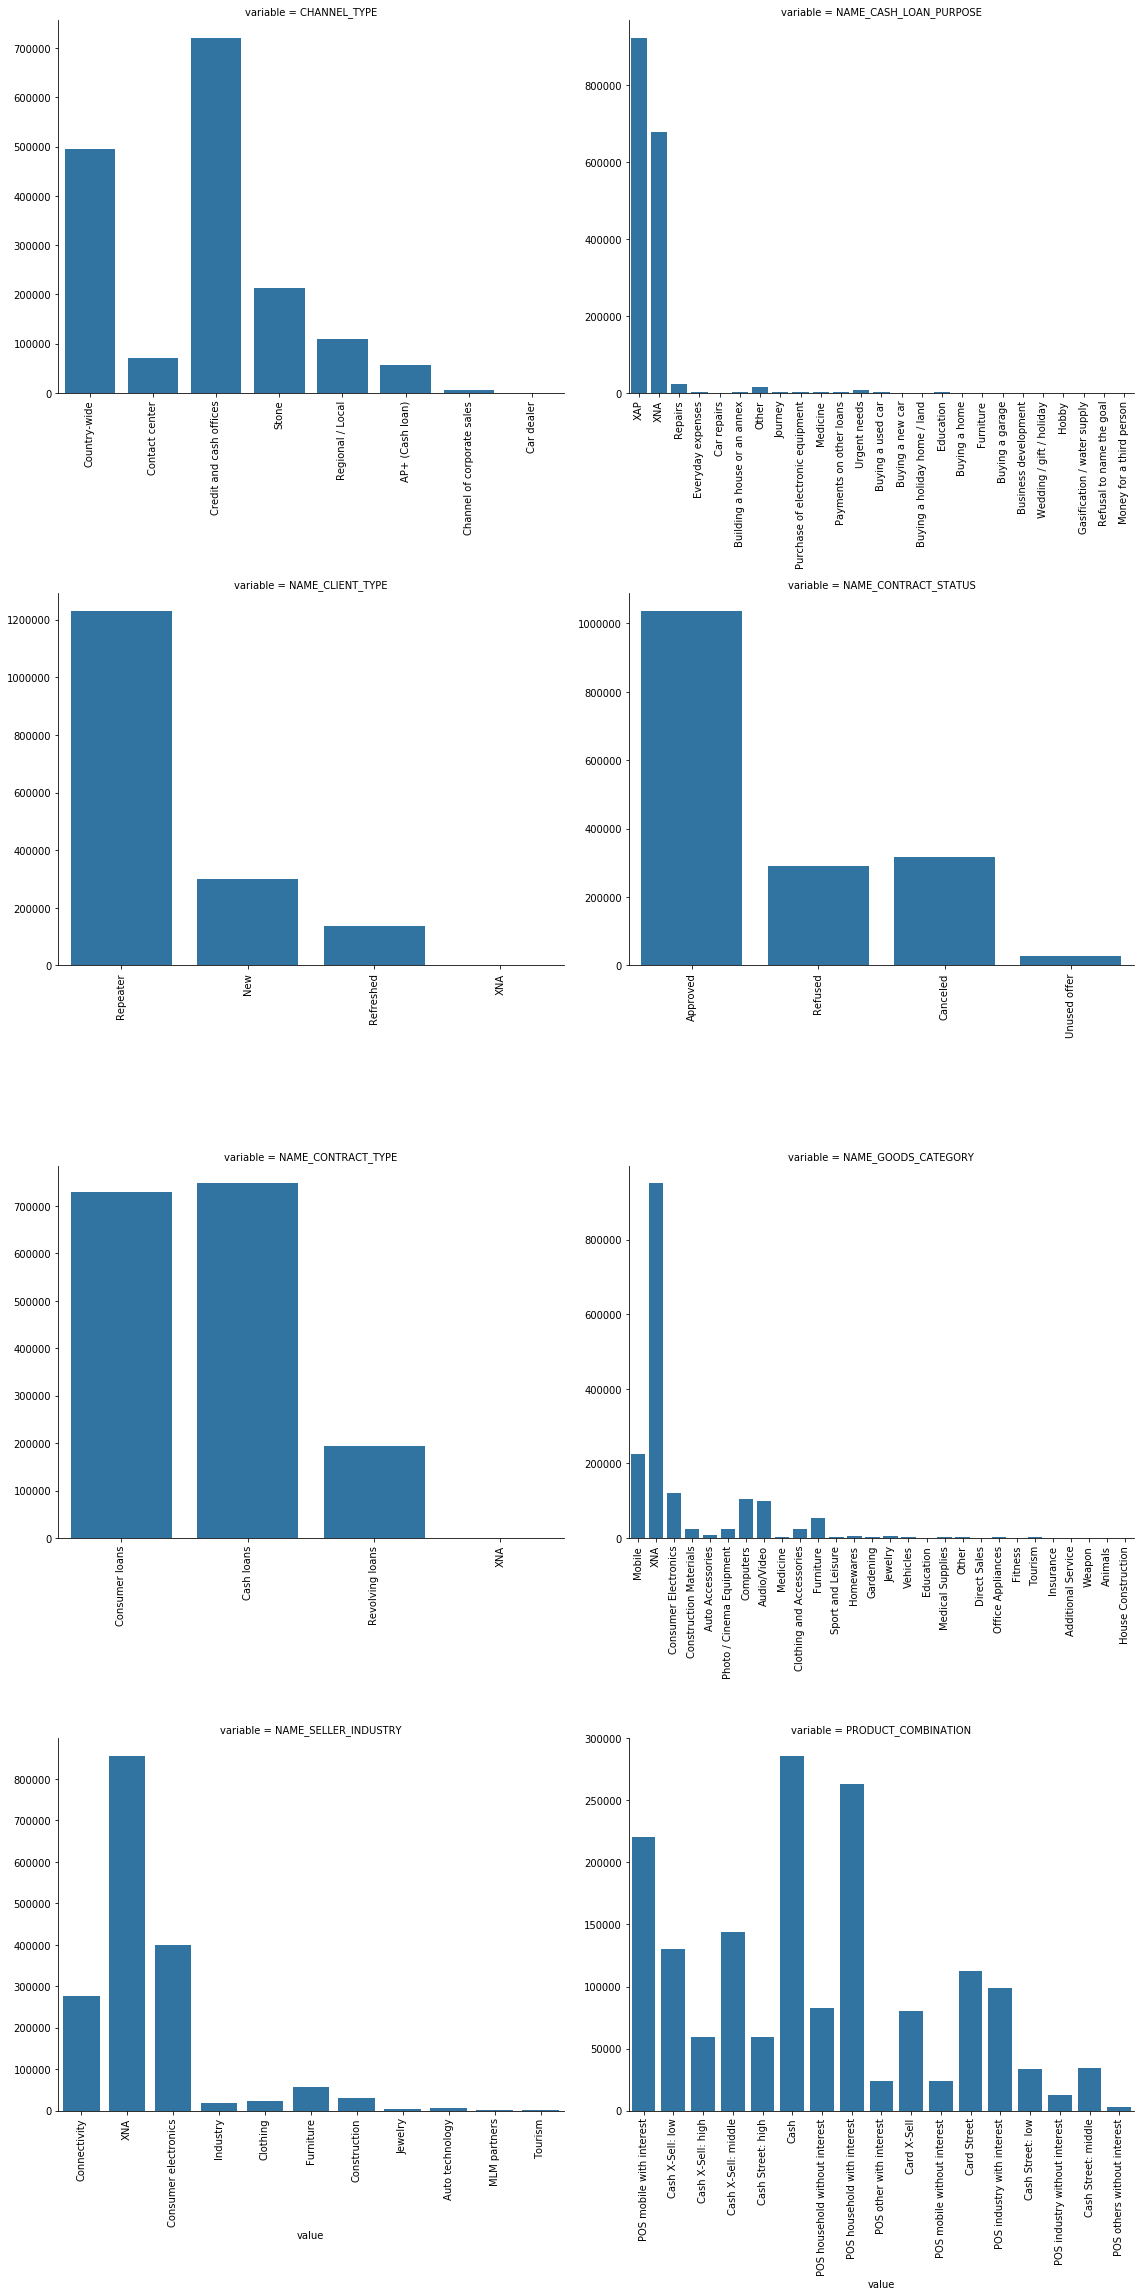

In [48]:
f = pd.melt(df, value_vars=sorted(categorical_data_relavant))
g = sns.FacetGrid(f, col='variable', col_wrap=2, sharex=False, sharey=False, size =len(categorical_data_relavant.columns))
plt.xticks(rotation='vertical')
g = g.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

This concluded univariate analysis of categorical variables.

Now we need to analyze each of these variables to look for indication of 'defaulter' group by each of these variables against 'NAME_CONTRACT_STATUS' to understand the distribution of each variable on 'NAME_CONTRACT_STATUS' Also look for percentage of Approved loans against each of the value of categorical variable Status can be Approved, Cancelled, Refused and Unused offers.

### Segmented Univariate Analysis

Lets observe correlation betweek numerical variables As we can observe, amt_application and amt_credit are highly correlated. So if credit asked by client at time of application increases, chances of final credit amount also increases Also, SK_ID_PREV and SK_ID_CURR are not related to any tendency and could be left out.

In [49]:
corr = numeric_data.corr().round(2)
corr.style.background_gradient(cmap='coolwarm')

,SK_ID_PREV,SK_ID_CURR,AMT_APPLICATION,AMT_CREDIT,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION
SK_ID_PREV,1,-0,0,0,-0,-0,0.02,-0,0,0,0,0,0
SK_ID_CURR,-0,1,0,0,0,0,-0,0,0,0,-0,0,0
AMT_APPLICATION,0,0,1,0.98,-0.01,0,0.13,-0.01,0.05,0.17,0.29,0.15,0.15
AMT_CREDIT,0,0,0.98,1,-0.02,-0.03,0.13,-0.01,0.03,0.17,0.3,0.16,0.16
HOUR_APPR_PROCESS_START,-0,0,-0.01,-0.02,1,0.01,-0.04,0.02,-0,-0,-0.02,-0,-0
NFLAG_LAST_APPL_IN_DAY,-0,0,0,-0.03,0.01,1,0.02,0,-0,-0.01,-0.01,-0.01,-0.01
DAYS_DECISION,0.02,-0,0.13,0.13,-0.04,0.02,1,-0.02,0.23,0.77,0.69,0.65,0.64
SELLERPLACE_AREA,-0,0,-0.01,-0.01,0.02,0,-0.02,1,-0,-0.01,-0.01,-0,-0
DAYS_FIRST_DRAWING,0,0,0.05,0.03,-0,-0,0.23,-0,1,0.29,0,0.07,-0.01
DAYS_FIRST_DUE,0,0,0.17,0.17,-0,-0.01,0.77,-0.01,0.29,1,0.89,0.85,0.82


Text(0, 0.5, 'Approved / Total Applications')

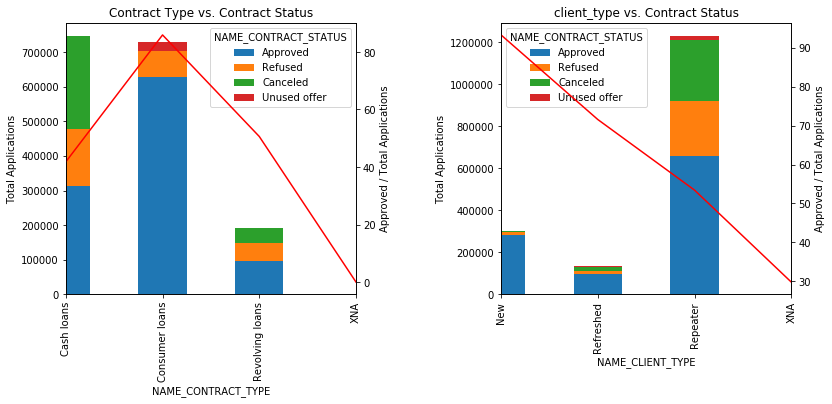

In [50]:
# group by 'NAME_CONTRACT_TYPE' & 'NAME_CONTRACT_STATUS' to see the distribution of nos. NAME_CONTRACT_TYPE vs. contract_status
df11 = df.groupby(['NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS'])['NAME_CONTRACT_STATUS'].count().unstack().fillna(0)
df11['percentage_approved'] = 100*df11['Approved']/(df11['Approved']+df11['Refused']+df11['Canceled']+df11['Unused offer'])
f = plt.figure(figsize=(13,5))
plt.subplots_adjust(wspace=0.5)
list_status = ['Approved','Refused','Canceled','Unused offer']
ax = f.add_subplot(121)
ax.set_title('Contract Type vs. Contract Status')
ax1 = df11[['Approved','Refused','Canceled','Unused offer']].plot(kind='bar',ax=ax,stacked=True)
ax2 = df11['percentage_approved'].plot(ax=ax1, color='r',secondary_y=True)
ax1.set_ylabel('Total Applications')
ax2.set_ylabel('Approved / Total Applications')
ax.tick_params(axis='x',labelrotation=90)

# group by 'NAME_CLIENT_TYPE' & 'contract_status' to see the distribution of nos. client type vs. contract_status
df12 = df.groupby(['NAME_CLIENT_TYPE','NAME_CONTRACT_STATUS'])['NAME_CONTRACT_STATUS'].count().unstack().fillna(0)
df12['percentage_approved'] = 100*df12['Approved']/(df12['Approved']+df12['Refused']+df12['Canceled']++df12['Unused offer'])
ax3 = f.add_subplot(122)
ax3.set_title('client_type vs. Contract Status')
ax4 = df12[['Approved','Refused','Canceled','Unused offer']].plot(kind='bar',ax=ax3,stacked=True)
ax5 = df12['percentage_approved'].plot(ax=ax4, color='r',secondary_y=True)
ax4.set_ylabel('Total Applications')
ax3.tick_params(axis='x',labelrotation=90)
ax5.set_ylabel('Approved / Total Applications')


As observed, Consumer loans are most approved contract types as opposed to revolving loans. Similarly, most of the approved loans are by repeater but percentage of approved loans among a specific client type is more for New clients. Infact unused loans exists for Consumer loans and Repeater mostly. Most of the cash loans are cancelled.

Text(0, 0.5, 'Approved / Total Applications')

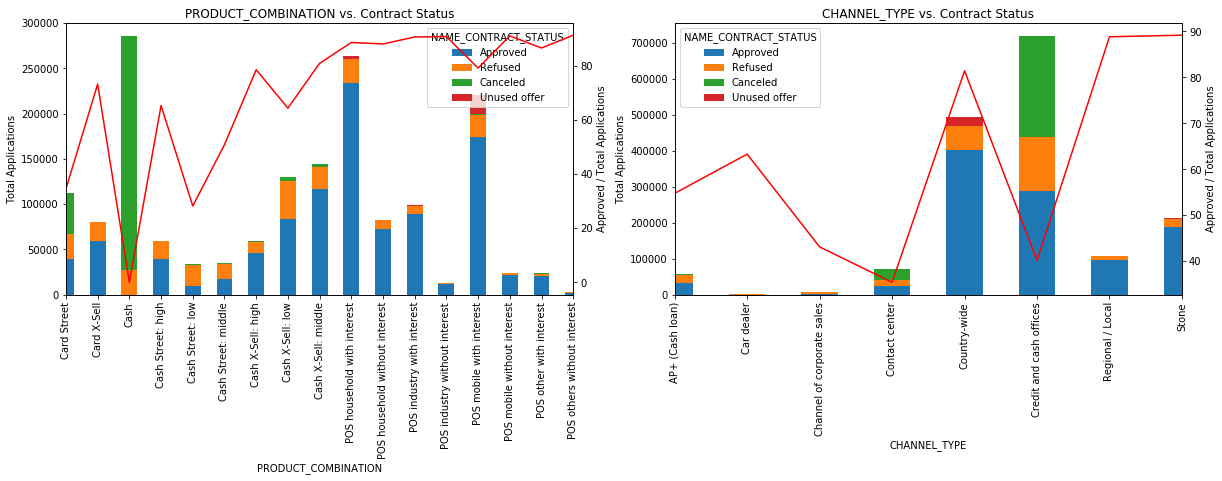

In [51]:
# group by 'PRODUCT_COMBINATION' & 'contract_status' to see the distribution of nos. PRODUCT_COMBINATION vs. contract_status
df11 = df.groupby(['PRODUCT_COMBINATION','NAME_CONTRACT_STATUS'])['NAME_CONTRACT_STATUS'].count().unstack().fillna(0)
df11['percentage_approved'] = 100*df11['Approved']/(df11['Approved']+df11['Refused']+df11['Canceled']++df11['Unused offer'])
f = plt.figure(figsize=(20,5))
ax = f.add_subplot(121)

ax.set_title('PRODUCT_COMBINATION vs. Contract Status')
ax1 = df11[['Approved','Refused','Canceled','Unused offer']].plot(kind='bar',ax=ax,stacked=True)
ax2 = df11['percentage_approved'].plot(ax=ax1, color='r',secondary_y=True)
ax1.set_ylabel('Total Applications')
ax1.tick_params(axis='x',labelrotation=90)
ax2.set_ylabel('Approved / Total Applications')

# group by 'CHANNEL_TYPE' & 'contract_status' to see the distribution of nos. CHANNEL_TYPE vs. contract_status
df12 = df.groupby(['CHANNEL_TYPE','NAME_CONTRACT_STATUS'])['NAME_CONTRACT_STATUS'].count().unstack().fillna(0)
df12['percentage_approved'] = 100*df12['Approved']/(df12['Approved']+df12['Refused']+df12['Canceled']++df12['Unused offer'])

ax3 = f.add_subplot(122)
ax3.set_title('CHANNEL_TYPE vs. Contract Status')
ax4 = df12[['Approved','Refused','Canceled','Unused offer']].plot(kind='bar',ax=ax3,stacked=True)
ax5 = df12['percentage_approved'].plot(ax=ax4, color='r',secondary_y=True)
ax4.set_ylabel('Total Applications')
ax4.tick_params(axis='x',labelrotation=90)
ax5.set_ylabel('Approved / Total Applications')

As observed, product with cash loans are mostly cancelled as we have observed above also. Loan are approved mostly in the cases of POS Household with interest. % of approved loans is higher in cases of POS household, industry, mobile and others. As we have observed above too, loans are approved for Country-wide and Credit and Cash offices. But % of approved loans i maximum in Regional and Stone channel types.

Text(0, 0.5, 'Approved / Total Applications')

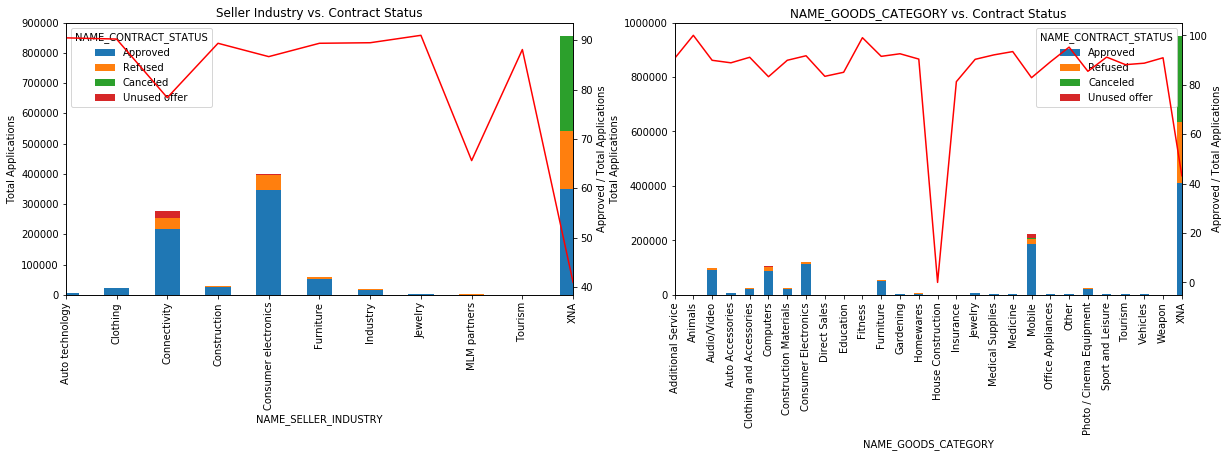

In [52]:
# group by 'NAME_SELLER_INDUSTRY' & 'NAME_CONTRACT_STATUS' to see the distribution of nos. NAME_SELLER_INDUSTRY vs. loan_status
df_grade = df.groupby(['NAME_SELLER_INDUSTRY','NAME_CONTRACT_STATUS'])['NAME_CONTRACT_STATUS'].count().unstack().fillna(0)
df_grade['percentage_approved'] = 100*df_grade['Approved']/(df_grade['Approved']+df_grade['Refused']+df_grade['Canceled']++df_grade['Unused offer'])
f = plt.figure(figsize=(20,5))
ax = f.add_subplot(121)

ax.set_title('Seller Industry vs. Contract Status')
ax1 = df_grade[['Approved','Refused','Canceled','Unused offer']].plot(kind='bar',ax=ax,stacked=True)
ax2 = df_grade['percentage_approved'].plot(ax=ax1, color='r',secondary_y=True)
ax1.set_ylabel('Total Applications')
ax1.tick_params(axis='x',labelrotation=90)
ax2.set_ylabel('Approved / Total Applications')

# group by 'NAME_GOODS_CATEGORY' & 'loan_status' to see the distribution of nos. NAME_GOODS_CATEGORY vs. loan_status
df_home_ownership = df.groupby(['NAME_GOODS_CATEGORY','NAME_CONTRACT_STATUS'])['NAME_CONTRACT_STATUS'].count().unstack().fillna(0)
df_home_ownership['percentage_approved'] = 100*df_home_ownership['Approved']/(df_home_ownership['Approved']+df_home_ownership['Refused']+df_home_ownership['Canceled']++df_home_ownership['Unused offer'])

ax3 = f.add_subplot(122)
ax3.set_title('NAME_GOODS_CATEGORY vs. Contract Status')
ax4 = df_home_ownership[['Approved','Refused','Canceled','Unused offer']].plot(kind='bar',ax=ax3,stacked=True)
ax5 = df_home_ownership['percentage_approved'].plot(ax=ax4, color='r',secondary_y=True)
ax4.set_ylabel('Total Applications')
ax4.tick_params(axis='x',labelrotation=90)
ax5.set_ylabel('Approved / Total Applications')

Percentage of approved loans is maximum for Auto technology, Clothing, Jewellery an Tourism and minimum fof XNA and MLM Partners. Similarly, approved loan percentage if maximum for good scategory 'Animals' and least for 'House Contruction'.

Text(0, 0.5, 'Approved / Total Applications')

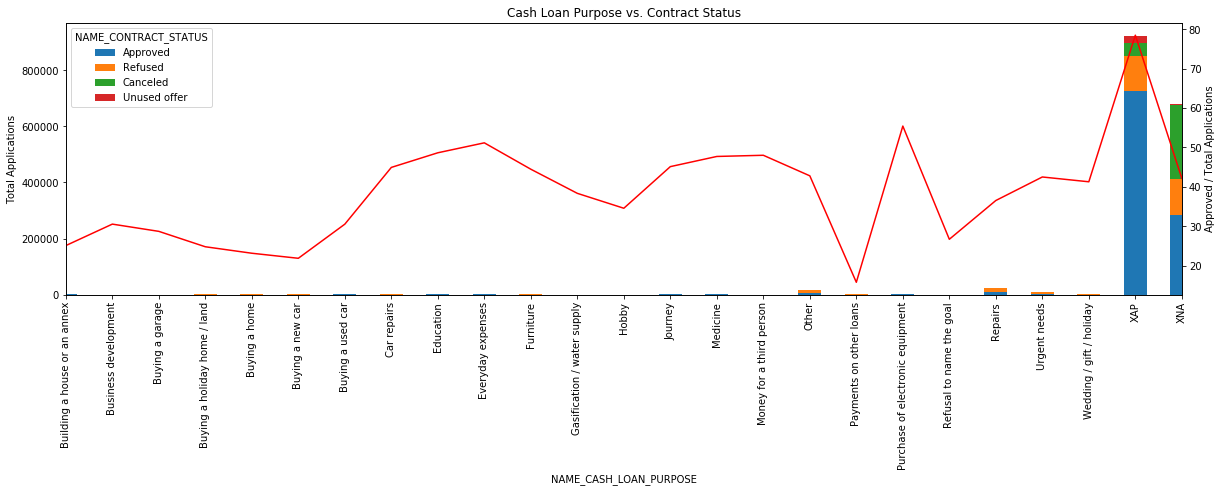

In [53]:
# group by 'NAME_CASH_LOAN_PURPOSE' & 'NAME_CONTRACT_STATUS' to see the distribution of nos. NAME_CASH_LOAN_PURPOSE vs. loan_status
df_grade = df.groupby(['NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS'])['NAME_CONTRACT_STATUS'].count().unstack().fillna(0)
df_grade['percentage_approved'] = 100*df_grade['Approved']/(df_grade['Approved']+df_grade['Refused']+df_grade['Canceled']++df_grade['Unused offer'])
f = plt.figure(figsize=(20,5))
ax = f.add_subplot(111)

ax.set_title('Cash Loan Purpose vs. Contract Status')
ax1 = df_grade[['Approved','Refused','Canceled','Unused offer']].plot(kind='bar',ax=ax,stacked=True)
ax2 = df_grade['percentage_approved'].plot(ax=ax1, color='r',secondary_y=True)
ax1.set_ylabel('Total Applications')
ax1.tick_params(axis='x',labelrotation=90)
ax2.set_ylabel('Approved / Total Applications')

Loans are approved mostly in caes of XAP and XNA. Although loan % is maximum in cases of XAP. Here we end the analysis of Categorical variables.

Let's start analysis of numerical variables. Plot distribution plot to understand at high level density of numerical variables across it values in dataset e.g. values of hours_appr_process_starts is normally distributed across the rows and varies between 0-20 with most no. of records around 10 around. the plot gives an idea if the variable can help identify any trend for loan status. if there are not enough variation, then it may be a dull variable

### Bivariate Analysis

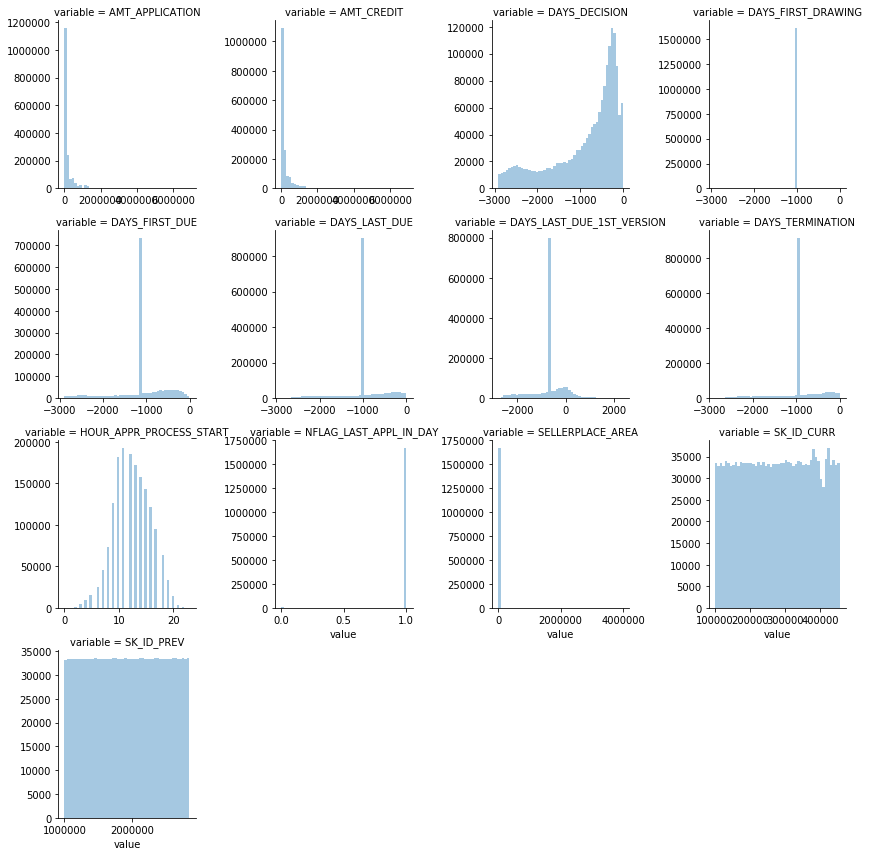

In [54]:
%matplotlib inline
f = pd.melt(df, value_vars=sorted(numeric_data))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value', kde= False)

As we have observed above also, HOUR_APPR_PROCESS_START is normally distributed. There are few dull variables like DAYS_FIRST_DRAWING, NFLAG_LAST_APPL_IN_DAY, SELLERPLACE_AREA. Few variables like SK_ID_CURR and SK_ID_PREV are evenly distributed and does nor effect our analysis much. Values for AMT_APPLICATION and AMT_CREDIT have an outlier values around 0.

In [56]:
# Using numeric columns for our analysis
numeric_data.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_APPLICATION', 'AMT_CREDIT',
       'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION',
       'SELLERPLACE_AREA', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION'],
      dtype='object')

In [57]:
numeric_data_relevant=numeric_data[['AMT_APPLICATION', 'AMT_CREDIT',
       'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION']]
numeric_data_relevant.describe()

,AMT_APPLICATION,AMT_CREDIT,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION
count,1.670214e+06,1.670213e+06,1.670214e+06,1.670214e+06,1.670214e+06
mean,1.752339e+05,1.961140e+05,1.248418e+01,9.964675e-01,-8.806797e+02
std,2.927798e+05,3.185746e+05,3.334028e+00,5.932963e-02,7.790997e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.922000e+03
25%,1.872000e+04,2.416050e+04,1.000000e+01,1.000000e+00,-1.300000e+03
50%,7.104600e+04,8.054100e+04,1.200000e+01,1.000000e+00,-5.810000e+02
75%,1.803600e+05,2.164185e+05,1.500000e+01,1.000000e+00,-2.800000e+02
max,6.905160e+06,6.905160e+06,2.300000e+01,1.000000e+00,-1.000000e+00


C:\Users\Shreyansh Behani\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Shreyansh Behani\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


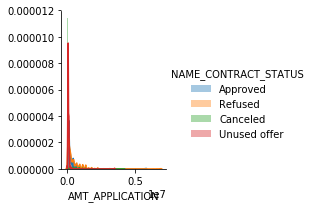

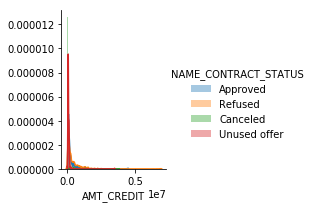

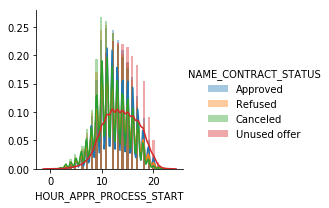

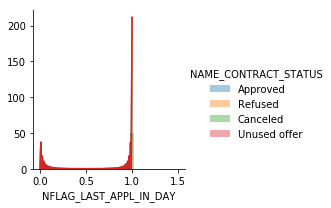

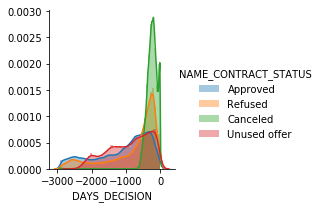

In [58]:
# Plot distribution plot to understand the spread/distribution of data

sns.FacetGrid(df, hue ='NAME_CONTRACT_STATUS').map(sns.distplot,'AMT_APPLICATION').add_legend()
sns.FacetGrid(df, hue ='NAME_CONTRACT_STATUS').map(sns.distplot,'AMT_CREDIT').add_legend()
sns.FacetGrid(df, hue ='NAME_CONTRACT_STATUS').map(sns.distplot,'HOUR_APPR_PROCESS_START').add_legend()
sns.FacetGrid(df, hue ='NAME_CONTRACT_STATUS').map(sns.distplot,'NFLAG_LAST_APPL_IN_DAY').add_legend()
sns.FacetGrid(df, hue ='NAME_CONTRACT_STATUS').map(sns.distplot,'DAYS_DECISION').add_legend()

Hours at which approval process starts is normally distributed for each status. Similarly, days_decision are evenly distributed for all category except cancelled which is normally distributed. If we observe, most of the values in AMT_APPLICATION and AMT_CREDIT are 0. Most of these loans are unused. Loans are cancelled within few days of application. Approval and refusal of loans take many days as banks have to analyse clients details.

In [60]:
print(df['AMT_CREDIT'].describe())
print(df['HOUR_APPR_PROCESS_START'].describe())
print(df['DAYS_DECISION'].describe())
print(df['AMT_APPLICATION'].describe())

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64
count    1.670214e+06
mean     1.248418e+01
std      3.334028e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.200000e+01
75%      1.500000e+01
max      2.300000e+01
Name: HOUR_APPR_PROCESS_START, dtype: float64
count    1.670214e+06
mean    -8.806797e+02
std      7.790997e+02
min     -2.922000e+03
25%     -1.300000e+03
50%     -5.810000e+02
75%     -2.800000e+02
max     -1.000000e+00
Name: DAYS_DECISION, dtype: float64
count    1.670214e+06
mean     1.752339e+05
std      2.927798e+05
min      0.000000e+00
25%      1.872000e+04
50%      7.104600e+04
75%      1.803600e+05
max      6.905160e+06
Name: AMT_APPLICATION, dtype: float64


As we can see from details of these columns and from box plot below, for approved loans, most of the values in AMT_CREDIT and AMT_APPLICATION are 0 and all values above 300000 are outside 3rd quartile. Most of the values either exists in second quartile or above 3rd quartile. For cancelled loans, most of the values are 0 and all values except 0 are outside 3rd quartile.

Text(0.5, 1.0, 'Days for Decision')

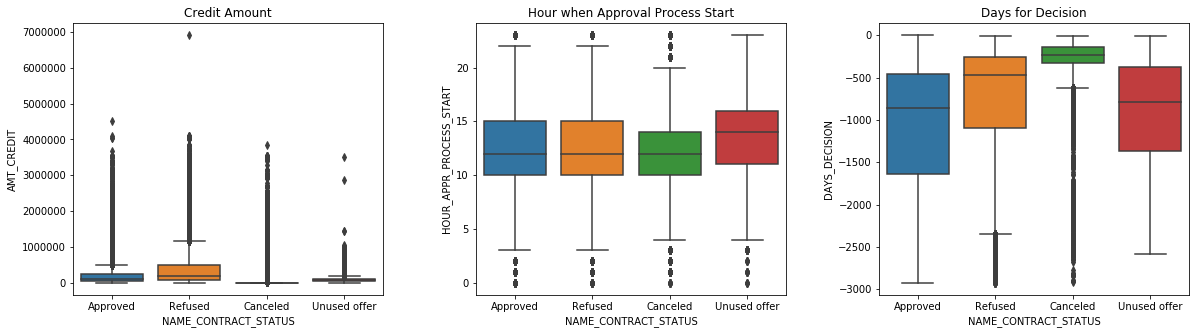

In [61]:
f,ax = plt.subplots(1,3,figsize=(20,5))
plt.subplots_adjust(wspace = 0.3)

sns.boxplot(y='AMT_CREDIT',x='NAME_CONTRACT_STATUS',data=df,orient='v',ax=ax[0]).set_title('Credit Amount')
# The Interest Rate is in higher range & median is also high (~13.5) for 'Charged off' loans vs ~11 for fully paid.
# Analysis: int_rate is an important indicator.

sns.boxplot(y='HOUR_APPR_PROCESS_START',x='NAME_CONTRACT_STATUS',data=df,orient='v',ax=ax[1]).set_title('Hour when Approval Process Start')
# Median is same for defaulted as well as Fully paid ~10,000. Although 75 percentile is marginally higher for defaulted loans
# Analysis: Not important variable

sns.boxplot(y='DAYS_DECISION',x='NAME_CONTRACT_STATUS',data=df,orient='v',ax=ax[2]).set_title('Days for Decision')
# Median is same for defaulted as well as Fully paid ~250. Although 75 percentile is marginally higher for defaulted loans
# Analysis: Not important variable

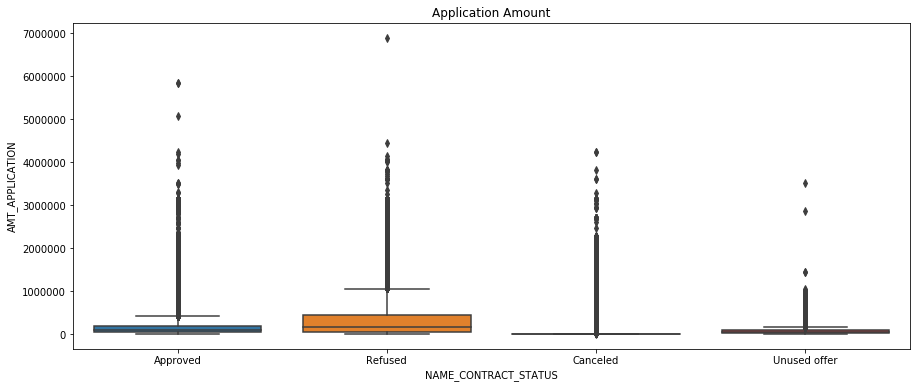

In [62]:
f = plt.figure(figsize=(15,6))
sns.boxplot(y='AMT_APPLICATION',x='NAME_CONTRACT_STATUS',data=df,orient='v').set_title('Application Amount')
plt.show()
# Median is same for defaulted as well as Fully paid ~250. Although 75 percentile is marginally higher for defaulted loans
# Analysis: Not important variable

For above Two plots:
1. As we observe, for approved loans, most of the values of AMT_CREDIT either lies between 1st and 2nd quartile or above 3rd quartile.
2. For cancelled loans, amount of credit should be 0 and same is shown in graph too.
3. With respect to hour when approval process starts, for approved loans, most values lie between 10 to 15 with few outliers in first quartile and fourth quartile.
4. Days for decision is highest for approved loans followed by unused offers and least for cancelled loans.
5. Outliers exists for refused an cancelled users.
6. Since application amount is highly correlated with credit amount, it shows similar trend as observed in graphs too.
7. If we plot frequency plot for flag where application is last application per day by client, most of the values are 1.
